In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import manifold
from sklearn.decomposition import PCA

from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction import image


## Data Reading / Control

In [2]:
musk= pd.read_csv('Musk1.csv', header = None)

In [3]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Columns: 168 entries, 0 to 167
dtypes: int64(168)
memory usage: 624.8 KB


In [4]:
musk.describe()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,...,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,0.434874,52.386555,38.731092,-120.142857,-79.243697,15.903361,-112.298319,-9.760504,-16.628151,7.762605,...,-221.728992,-204.405462,-108.262605,-25.231092,37.428571,79.752101,85.363445,-34.128151,-26.241597,33.714286
std,0.496262,26.908691,18.087948,88.313464,69.172519,75.515959,28.704947,92.025496,106.560891,75.786461,...,63.021801,89.566426,121.794583,65.588295,87.315888,49.269244,47.487575,16.019277,58.009205,54.189087
min,0.000000,1.000000,-9.000000,-199.000000,-166.000000,-115.000000,-117.000000,-184.000000,-170.000000,-231.000000,...,-252.000000,-324.000000,-217.000000,-135.000000,-126.000000,-78.000000,35.000000,-132.000000,-258.000000,-72.000000
25%,0.000000,29.000000,31.000000,-193.000000,-144.000000,-53.000000,-117.000000,-89.000000,-159.000000,-9.250000,...,-240.000000,-264.000000,-208.000000,-91.000000,-39.250000,33.000000,54.000000,-42.250000,-28.000000,-12.000000
50%,0.000000,56.500000,42.000000,-144.500000,-108.000000,28.000000,-117.000000,11.000000,41.000000,18.000000,...,-236.000000,-236.000000,-189.500000,-15.000000,31.500000,84.000000,69.000000,-36.000000,-11.000000,35.000000
75%,1.000000,81.000000,50.000000,-101.000000,-21.000000,38.000000,-117.000000,70.250000,51.000000,57.000000,...,-232.000000,-154.750000,30.000000,22.000000,128.000000,119.000000,99.000000,-28.000000,7.000000,74.000000
max,1.000000,92.000000,130.000000,98.000000,83.000000,157.000000,238.000000,200.000000,214.000000,188.000000,...,141.000000,72.000000,173.000000,185.000000,253.000000,291.000000,302.000000,24.000000,82.000000,235.000000


In [5]:
musk.head(2)

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30


In [6]:
header_part1 = ['Bag_Class', 'Bag_ID']

In [7]:
musk.columns=header_part1+['Feature_'+str(x+1) for x in range(musk.shape[1]-len(header_part1))]

## Task-1 - a - PCA Analysis

In [8]:
def pca_analysis (df) : 
    Feature_List  = df.columns.to_list()
    feature = [s for s in Feature_List if "Feature" in s]
   # Separating out the features
    x = df.loc[:, feature].values
    # Separating out the target
    y = df.loc[:,['Bag_Class']].values 
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, df[['Bag_Class']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [1,0]
    colors = ['r', 'g', ]
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Bag_Class'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

    

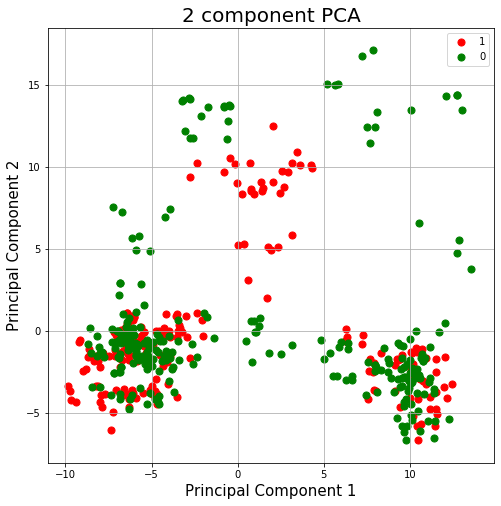

In [9]:
pca_analysis(musk)

## Task-1 - a - MDS Analysis

In [10]:
def plot_MDS(df):
    Feature_List  = df.columns.to_list()
    feature = [s for s in Feature_List if "Feature" in s]
   # Separating out the features
    x = df.loc[:, feature].values
    # Separating out the target
    y = df.loc[:,['Bag_Class']].values 
    mds=manifold.MDS(n_components=2, random_state=42)
    x=mds.fit_transform(x)
    principalDf = pd.DataFrame(data = x, columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([principalDf, df[['Bag_Class']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title('2 component MDS', fontsize = 20)
    targets = [1,0]
    colors = ['r', 'g', ]
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Bag_Class'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                   , finalDf.loc[indicesToKeep, 'Component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

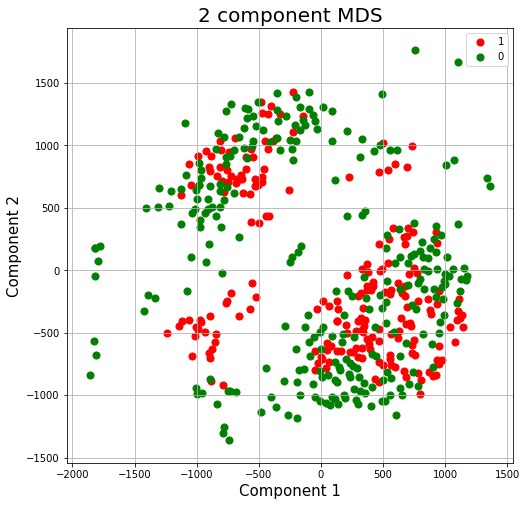

In [11]:
plot_MDS(musk)

Difference between PCA components variance is not low. Also MDS stress value is not low. Hence the data cannot be seperable easily on the graph

## Task-1 - b - PCA Analysis


In [12]:
musk_groupby =  musk.groupby(['Bag_ID']).mean()

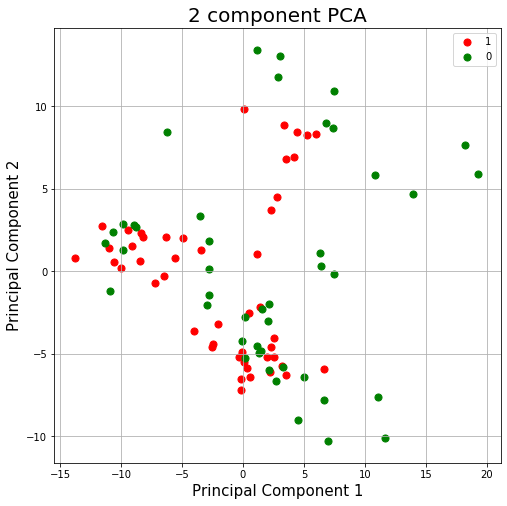

In [13]:
pca_analysis(musk_groupby)

## Task-1 - b - MDS Analysis

In [ ]:
plot_MDS(musk_groupby)

Second graphs of MDS and PCA are more fitted than the first ones. Because the variance values of components and stress value of MDS are more suitable for the better fit model

## Bonus

Min, max or median value of bag_ıd can be used as an approach to summarize the data for MIL.

### Task - 2 - 1

In [ ]:
cat = plt.imread('cat.jpg')
plt.imshow(cat)
plt.show()

In [ ]:
uniform = np.random.uniform(cat.min(),cat.max()/10,(256,256,3))
noisy_image = (cat + uniform)
noisy_image = noisy_image.astype('uint8')
plt.imshow(noisy_image)

## Task 2-2-b

In [ ]:


# Read
img = noisy_image

# Split
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# Plot
fig, axs = plt.subplots(1,4,figsize=(12,12))

cat_original = axs[0].imshow(img)

cat_red = axs[1].imshow(red, cmap='Reds')

cat_green = axs[2].imshow(green, cmap='Greens')

cat_blue = axs[3].imshow(blue, cmap='Blues')



plt.show()

In [ ]:
gray = rgb2gray(noisy_image)
plt.imshow(gray, cmap = plt.get_cmap('gray'))


## Task-3-a

In [ ]:
patches = image.extract_patches_2d(gray,(25, 25))

In [ ]:
patches_reshape = patches.reshape(patches.shape[0],-1)

In [ ]:
patches_reshape.shape

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(patches_reshape)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])


component_1 = principalDf['principal component 1'].values
component_2 = principalDf['principal component 2'].values
component_3 = principalDf['principal component 3'].values


fig, axs = plt.subplots(1,3,figsize=(12,12))

compo_1 = axs[0].imshow(component_1.reshape(232,232),cmap='gray')

compo_2 = axs[1].imshow(component_2.reshape(232,232),cmap='gray')

compo_3 = axs[2].imshow(component_3.reshape(232,232),cmap='gray')

In [ ]:
print(pca.explained_variance_ratio_)

First component has a higher variance so first picture resembles to the original noise image than the other components picture.

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(12,12))

compo_1 = axs[0].imshow(pca.components_[0].reshape(25,25),cmap='gray')

compo_2 = axs[1].imshow(pca.components_[1].reshape(25,25),cmap='gray')

compo_3 = axs[2].imshow(pca.components_[2].reshape(25,25),cmap='gray')

Each eigenvector emphasizes that different parts of the image.